In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Exercise 3

### Question A

In [2]:
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

In [3]:
df = pd.DataFrame(np.concatenate((x, y), axis=1), columns=('x1', 'x2', 'y'))
df.style.hide()

x1,x2,y
0,0,0
0,1,1
1,0,1
1,1,0


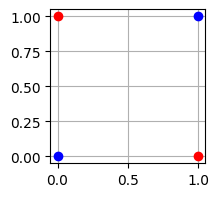

In [4]:
plt.figure(figsize=(2,2))

plt.plot(*x[0], 'o', color='blue')
plt.plot(*x[1], 'o', color='red')
plt.plot(*x[2], 'o', color='red')
plt.plot(*x[3], 'o', color='blue')
plt.grid()

plt.show()

In [5]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, one_hot=False):
        # Initialize number of nodes of input, hidden, and output layer
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Use of one_hot encoding
        self.one_hot = one_hot

        # Initialize weights (w) and biases (b)
        # input -> hidden
        self.w1 = np.random.rand(self.input_size, self.hidden_size) # 35*10
        self.b1 = np.zeros((1, self.hidden_size)) # 1*10

        # hidden -> output
        self.w2 = np.random.rand(self.hidden_size, self.output_size) # 10*1
        self.b2 = np.zeros((1, self.output_size)) # 1*1

    def sigmoid(self, x, deriv=False):
        """Sigmoid activation function"""
        if deriv:
            return self.sigmoid(x) * (1 - self.sigmoid(x))
        return 1 / (1 + np.exp(-x))

    def reLU(self, x):
        """reLU activation function"""
        return np.maximum(0, x)

    def one_hot_encoding(self, y):
        """Encode digit to one-hot (used in error calculation of backpropagation)"""
        y = y.reshape(-1, 10)
        encoded_y = np.zeros((y.size, y.max() + 1))
        encoded_y[np.arange(y.size), y.flatten()] = 1
        encoded_y = encoded_y.T
        return encoded_y

    def feedforward(self, x):
        """Feedforward"""
        # input -> hidden
        self.z1 = np.dot(x, self.w1) + self.b1 # 10*35 @ 35*10 = 10*10
        self.a1 = self.sigmoid(self.z1)

        # hidden -> output
        self.z2 = np.dot(self.a1, self.w2) + self.b2 # 10*10 @ 10*1 = 10*1
        self.a2 = self.sigmoid(self.z2) # 10*1

        return self.a2

    def backpropagation(self, x, y, learning_rate):
        """Backpropagation"""        
        self.m = y.size
        
        self.d_z2 = self.a2 - y # 10*1
        self.d_w2 = np.dot(self.a1.T, self.d_z2) / self.m # 10*10 @ 10*1 = 10*1
        self.d_b2 = np.sum(self.d_z2) / self.m # 1*1
        
        self.d_z1 = np.dot(self.d_z2, self.w2.T) * self.sigmoid(self.z1, deriv=True) # 10*1 @ 1*10
        self.d_w1 = np.dot(x.T, self.d_z1) / self.m
        self.d_b1 = np.sum(self.d_z1) / self.m

        self.w1 -= self.d_w1 * learning_rate
        self.b1 -= self.d_b1 * learning_rate
        self.w2 -= self.d_w2 * learning_rate
        self.b2 -= self.d_b2 * learning_rate

    def train(self, x, y, learning_rate, epochs):
        """Optimize weight and bias parameters""" 
        if self.one_hot:
            y = self.one_hot_encoding(y)
        
        for epoch in range(epochs):
            self.feedforward(x)
            self.backpropagation(x, y, learning_rate)

            if not epoch % (epochs / 10):
                loss = np.mean(np.square(y - self.a2))
                print(f'Epoch {epoch}: {loss}')

    def predict(self, x):
        """Get feedforward result with current parameters"""
        return self.feedforward(x)

In [6]:
learning_rate = 0.1
epochs = 10000
nn_A = NeuralNetwork(2, 2, 1)
nn_A.train(x, y, learning_rate, epochs)
nn_A.predict(x)

Epoch 0: 0.2508653695349208
Epoch 1000: 0.2500009035162293
Epoch 2000: 0.25000000575503256
Epoch 3000: 0.25000000210353174
Epoch 4000: 0.2500000019475553
Epoch 5000: 0.2500000018167567
Epoch 6000: 0.2500000016962981
Epoch 7000: 0.2500000015851761
Epoch 8000: 0.2500000014825534
Epoch 9000: 0.25000000138767947


array([[0.50002349],
       [0.49995475],
       [0.50004528],
       [0.49997655]])

### Question B

Load raw data

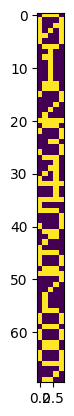

In [7]:
data = np.loadtxt("TP3-ej3-digitos.txt", dtype=np.uint8) 
plt.imshow(data);

Flatten data

In [8]:
data_flattened = data.flatten()
data_flattened = np.reshape(data_flattened, (10, 35))

print(data_flattened.shape)
data_flattened

(10, 35)


array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 1

Initialize x input (flattened digit) and y output (result of whether digit is pair)

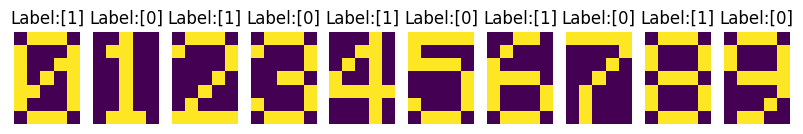

In [9]:
x = data_flattened
y = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0]).reshape(-1, 1)

plt.figure(figsize=(10, 3))
for i, img in enumerate(data_flattened):
    plt.subplot(1, 10, i+1)
    plt.title('Label:' + str(y[i]))
    plt.axis('off')
    plt.imshow(np.reshape(img, (7,5)))

In [10]:
input_size = 35
hidden_size = 10
output_size = 1

learning_rate = 0.1
epochs = 10000

nn_B = NeuralNetwork(input_size, hidden_size, output_size)
nn_B.train(x, y, learning_rate, epochs)
nn_B.predict(x)

Epoch 0: 0.499999999999509
Epoch 1000: 0.00027261695355568346
Epoch 2000: 0.00012631391876908378
Epoch 3000: 7.485289972168121e-05
Epoch 4000: 4.902254326852023e-05
Epoch 5000: 3.421884960764456e-05
Epoch 6000: 2.500664522963285e-05
Epoch 7000: 1.892252575504261e-05
Epoch 8000: 1.4715793885393357e-05
Epoch 9000: 1.1698596522715447e-05


array([[9.96164860e-01],
       [9.90374843e-06],
       [9.99944692e-01],
       [4.28945467e-03],
       [9.99999165e-01],
       [4.12956082e-03],
       [9.99999997e-01],
       [1.59256808e-03],
       [9.93872586e-01],
       [2.10744689e-03]])

digit is even: [[0.00412956]]


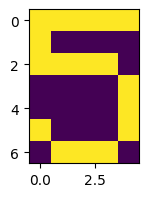

In [11]:
digit = 5

plt.figure(figsize=(2,2))
plt.imshow(np.reshape(data_flattened[digit], (7,5)));
res = nn_B.predict(data_flattened[digit])
print('digit is even:', res)

In [12]:
threshold = 0.5
res = nn_B.predict(data_flattened[digit])
is_even = res > threshold
print(f'The digit is even: {is_even}')

The digit is even: [[False]]


### Exercise C

Initialize data
- x: 10*35 (10 digits * 35 pixels each)
- y: 10*1 (can be classified to 10 possible digits)

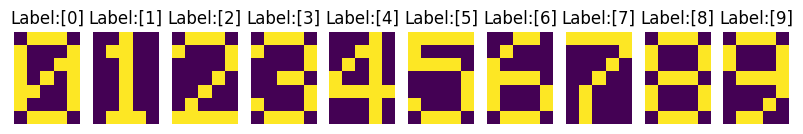

In [13]:
x = data_flattened
y = np.arange(10).reshape(-1, 1)

plt.figure(figsize=(10, 3))
for i, img in enumerate(data_flattened):
    plt.subplot(1, 10, i+1)
    plt.title('Label:' + str(y[i]))
    plt.axis('off')
    plt.imshow(np.reshape(img, (7,5)))

In [14]:
input_size = 35
hidden_size = 10
output_size = 10

learning_rate = 0.1
epochs = 100000

nn_C = NeuralNetwork(input_size, hidden_size, output_size, one_hot=True)
nn_C.train(x, y, learning_rate, epochs)
nn_C.predict(x)

Epoch 0: 0.899999999867704
Epoch 10000: 0.002345218225774676
Epoch 20000: 0.0005677121316680207
Epoch 30000: 0.00022553180597156169
Epoch 40000: 0.00011496485379220087
Epoch 50000: 6.787028982053245e-05
Epoch 60000: 4.408977391151032e-05
Epoch 70000: 3.062268104231519e-05
Epoch 80000: 2.2342345576631514e-05
Epoch 90000: 1.6926792623524673e-05


array([[9.93587986e-01, 2.99440933e-09, 7.91987068e-06, 1.34568943e-11,
        7.56339902e-04, 2.01916953e-06, 1.81657658e-05, 6.28436852e-07,
        6.65987714e-04, 1.26530805e-03],
       [7.37815418e-05, 9.96148009e-01, 3.13377801e-03, 8.18795301e-04,
        1.56484073e-03, 3.47847039e-03, 5.38335196e-04, 9.34476026e-05,
        4.69001868e-10, 2.56154131e-08],
       [9.91555209e-07, 2.07554023e-03, 9.94307930e-01, 2.56309473e-04,
        6.49792981e-05, 3.08093965e-06, 2.95210079e-05, 7.13131277e-06,
        7.48999541e-11, 9.79183237e-05],
       [1.63355854e-06, 1.01830092e-05, 1.19798604e-04, 9.82363517e-01,
        6.59086250e-06, 4.77440337e-04, 1.04002492e-03, 1.15395504e-03,
        3.03196547e-03, 2.57126264e-04],
       [3.73839388e-03, 3.44504524e-04, 5.63592905e-04, 6.55688726e-07,
        9.96756856e-01, 1.19332444e-05, 2.13429584e-03, 2.03084150e-06,
        1.76552990e-08, 1.97706015e-08],
       [1.05586704e-05, 1.63268439e-04, 5.86281543e-06, 2.48537659e-03,
   

[[1.05586704e-05 1.63268439e-04 5.86281543e-06 2.48537659e-03
  4.80754179e-06 9.91696569e-01 1.17708509e-08 2.36538350e-06
  5.73076761e-05 2.80195800e-03]]
digit is: 5


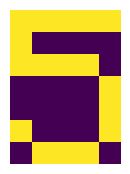

In [15]:
digit = 5

plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(np.reshape(data_flattened[digit], (7,5)));
res = nn_C.predict(data_flattened[digit])
print(res)
print('digit is:', np.argmax(res))

In [16]:
def salt_pepper_noise(img, salt_probability, pepper_probability):
    img_copy = np.copy(img)
    salt = np.random.rand(img.size) < salt_probability
    pepper = np.random.rand(img.size) < pepper_probability
    img_copy[salt] = 1
    img_copy[pepper] = 0
    return img_copy

def random_noise(img):
    img_copy = np.copy(img)
    img_copy = img_copy + np.random.rand(img_copy.size)
    return img_copy

def gaussian_noise(img, mean, std):
    img_copy = np.copy(img)
    img_copy = img_copy + np.random.normal(mean, std, img_copy.size)
    return img_copy

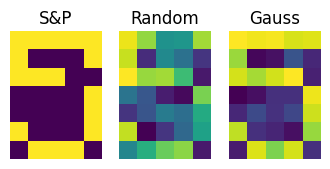

In [17]:
salt_pepper_digit = salt_pepper_noise(data_flattened[digit], 0.05, 0.05)
random_digit = random_noise(data_flattened[digit])
gauss_digit = gaussian_noise(data_flattened[digit], 0.1, 0.1)

noised_data = [salt_pepper_digit, random_digit, gauss_digit]
titles = ['S&P', 'Random', 'Gauss']

plt.figure(figsize=(4,3))
for i, img in enumerate(noised_data):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i])
    plt.axis('off')
    plt.imshow(np.reshape(img, (7,5)));

In [18]:
np.argmax(nn_C.predict(random_digit))

5